<a href="https://colab.research.google.com/github/DhanashreeAmbekar/Deep-Learning/blob/main/Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Sentiment (Text) Analysis Natural Language Processing

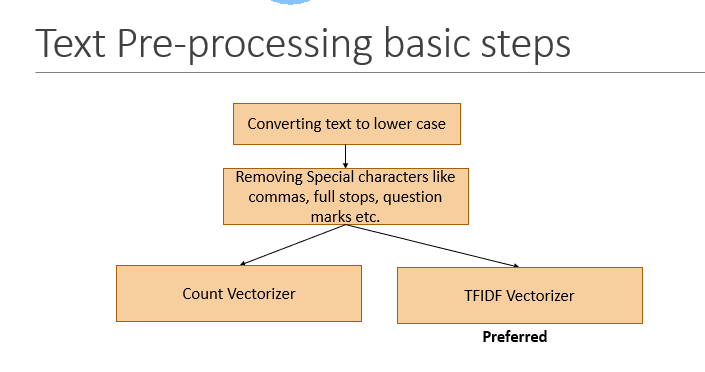

In [2]:
from warnings import filterwarnings
filterwarnings("ignore")


In [3]:
import pandas as pd
url = "https://raw.githubusercontent.com/utkarshg1/Neural-Net-Datasets/refs/heads/main/Restaurant_Reviews.tsv"
df = pd.read_csv(url, sep="\t")
df.head()

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [4]:
import re

In [5]:
def preprocess_text(text: str):
  text = text.lower()
  text = re.sub("[^a-z0-9 ]", "", text)
  return text


In [6]:
s1 = "Wow!... This place, is amazing! 5 out of 5"
s1

'Wow!... This place, is amazing! 5 out of 5'

In [7]:
preprocess_text(s1)

'wow this place is amazing 5 out of 5'

### Apply above preprocessing on entire data

In [8]:
df["pre"] = df["Review"].apply(preprocess_text)


In [9]:
df

,Review,Liked,pre
0,Wow... Loved this place.,1,wow loved this place
1,Crust is not good.,0,crust is not good
2,Not tasty and the texture was just nasty.,0,not tasty and the texture was just nasty
3,Stopped by during the late May bank holiday of...,1,stopped by during the late may bank holiday of...
4,The selection on the menu was great and so wer...,1,the selection on the menu was great and so wer...
...,...,...,...
995,I think food should have flavor and texture an...,0,i think food should have flavor and texture an...
996,Appetite instantly gone.,0,appetite instantly gone
997,Overall I was not impressed and would not go b...,0,overall i was not impressed and would not go back
998,"The whole experience was underwhelming, and I ...",0,the whole experience was underwhelming and i t...


### seperate X and Y

In [10]:
X = df["pre"]
Y = df[["Liked"]]

In [11]:
X.head()

,pre
0,wow loved this place
1,crust is not good
2,not tasty and the texture was just nasty
3,stopped by during the late may bank holiday of...
4,the selection on the menu was great and so wer...


In [12]:
Y.head()

,Liked
0,1
1,0
2,0
3,1
4,1


In [13]:
Y.value_counts()

,count
Liked,
0,500
1,500


### Apply TFIDF

In [14]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [15]:
tfidf = TfidfVectorizer()
X_pre = tfidf.fit_transform(X).toarray()
X_pre

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [16]:
X_pre.shape

(1000, 2067)

### Dimensionality Reduction

Reduce the number of columns by mainting most of information from data

SVD - Singular Value Decomposition

In [17]:
from sklearn.decomposition import TruncatedSVD


In [18]:
n_components = 300
svd = TruncatedSVD(n_components)
X_pre_red = svd.fit_transform(X_pre)
X_pre_red

array([[ 0.11457856,  0.19021731,  0.29860515, ..., -0.04790719,
         0.02047598,  0.02003333],
       [ 0.20041515,  0.06219206,  0.10386267, ...,  0.06448983,
        -0.01579065, -0.02628154],
       [ 0.248602  , -0.05947124, -0.09197253, ..., -0.00665025,
        -0.00271983,  0.01432559],
       ...,
       [ 0.25745938,  0.21354303, -0.25268861, ..., -0.00824413,
        -0.00128244,  0.00950096],
       [ 0.21755074,  0.04422347, -0.07900026, ...,  0.01501803,
         0.00998952,  0.00933837],
       [ 0.22278543,  0.02689928, -0.02221587, ..., -0.00680421,
        -0.00471982,  0.04269368]])

In [19]:

X_pre_red.shape

(1000, 300)

### TFIDF > SVD - Latent Semantic Analysis (LSA)

### Apply Train Test split


In [20]:
from sklearn.model_selection import train_test_split

xtrain, xtest, ytrain, ytest = train_test_split(X_pre_red, Y, test_size=0.2, random_state=42)


In [21]:
xtrain

array([[ 0.22714971, -0.13552748, -0.05020056, ..., -0.01671619,
        -0.00669095,  0.0773443 ],
       [ 0.04699212,  0.0134224 ,  0.03451726, ..., -0.03352717,
        -0.05042509, -0.03190388],
       [ 0.19705026, -0.13148614, -0.08873097, ..., -0.01098776,
        -0.00058464, -0.01183101],
       ...,
       [ 0.28454308,  0.11308599,  0.31554384, ...,  0.00602828,
        -0.00662823, -0.01561054],
       [ 0.16594076, -0.07105197, -0.05824824, ...,  0.03020299,
        -0.03945519,  0.02054962],
       [ 0.17456908,  0.04421883,  0.01479549, ...,  0.03562435,
        -0.01680646,  0.017889  ]])

In [22]:
ytrain

,Liked
29,0
535,1
695,0
557,0
836,1
...,...
106,1
270,1
860,1
435,0


In [23]:
xtest

array([[ 7.69189233e-02,  1.34941597e-01, -7.03830866e-02, ...,
         7.19936728e-03,  4.12199236e-03, -7.65036444e-03],
       [ 2.54266004e-01, -7.50053930e-02, -3.37347062e-02, ...,
        -1.45110827e-02,  1.98879204e-02,  2.70304576e-04],
       [ 2.65741145e-01,  1.06919681e-02,  9.62323787e-02, ...,
         2.00514386e-02, -1.24255705e-02,  2.68816561e-02],
       ...,
       [ 1.49168849e-01,  1.66499904e-01,  2.20766307e-01, ...,
        -7.83327669e-03, -4.03907532e-04, -3.66999428e-03],
       [ 1.46406258e-01,  2.12869453e-01, -2.16913296e-01, ...,
         1.37936496e-02,  1.36013090e-02,  3.28005596e-03],
       [ 3.20891746e-01, -2.48193598e-02,  1.88372552e-02, ...,
        -3.44382822e-02, -3.37439861e-03, -2.43182504e-02]])

In [24]:
ytest

,Liked
521,1
737,1
740,1
660,1
411,1
...,...
408,1
332,1
208,0
613,0


In [25]:
xtrain.shape

(800, 300)

In [26]:
xtest.shape

(200, 300)

In [27]:
xtrain.shape[1]

300

### build the nueral network

In [28]:
from keras.models import Sequential
from keras.layers import Input, Dense, Dropout
from keras import regularizers
from keras.callbacks import EarlyStopping

In [29]:
model = Sequential(
    [
        Input(shape=(xtrain.shape[1],)),
        Dense(128, activation="relu", kernel_regularizer=regularizers.l2(0.01)),
        Dropout(0.5),
        Dense(64, activation="relu", kernel_regularizer=regularizers.l2(0.01)),
        Dropout(0.5),
        Dense(1, activation="sigmoid")
    ]
)

In [30]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 128)                 │          38,528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 46,849 (183.00 KB)

 Trainable params: 46,849 (183.00 KB)

 Non-trainable params: 0 (0.00 B)

In [31]:
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [32]:
es = EarlyStopping(patience=10, restore_best_weights=True)


In [33]:
hist = model.fit(
    xtrain, ytrain,
    validation_data=(xtest, ytest),
    epochs=200,
    batch_size=32,
    callbacks = [es]
)



Epoch 1/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 5s 37ms/step - accuracy: 0.5375 - loss: 3.0218 - val_accuracy: 0.5650 - val_loss: 2.2010
Epoch 2/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.5393 - loss: 2.0025 - val_accuracy: 0.6400 - val_loss: 1.5075
Epoch 3/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5535 - loss: 1.3957 - val_accuracy: 0.6250 - val_loss: 1.1217
Epoch 4/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6084 - loss: 1.0588 - val_accuracy: 0.7300 - val_loss: 0.9142
Epoch 5/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6929 - loss: 0.8791 - val_accuracy: 0.7150 - val_loss: 0.8055
Epoch 6/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7860 - loss: 0.7793 - val_accuracy: 0.7350 - val_loss: 0.7479
Epoch 7/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7893 - loss: 0.7257 - val_accuracy: 0.7900 - val_loss: 0.7148
Epoch 8/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8273 - loss: 0.6881 - val_accuracy: 0.7850 - 

### Plot the learning curve

In [34]:
import matplotlib.pyplot as plt

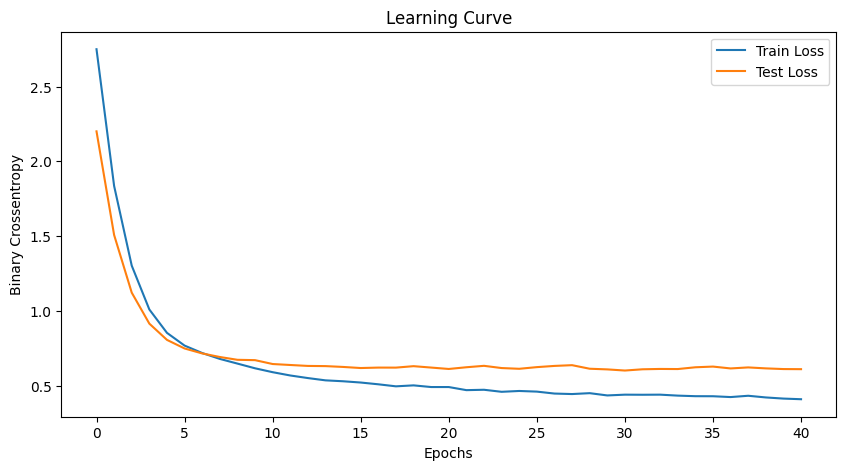

In [35]:
plt.figure(figsize=(10, 5))
plt.plot(hist.history["loss"], label="Train Loss")
plt.plot(hist.history["val_loss"], label="Test Loss")
plt.xlabel("Epochs")
plt.ylabel("Binary Crossentropy")
plt.title("Learning Curve")
plt.legend()
plt.show()

### model Evaluation